In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trapezoid_method(f, a, b, N):
    xi = a
    xj = a + (b - a) / N
    h = (b - a) / N
    I = 0
    for i in range(N):
        I += (f(xi) + f(xj)) * h / 2
        xi += h
        xj += h
    return I

In [3]:
def simpsons_method(f, a, b, N):
    xi = a
    xj = a + (b - a) / N
    h = (b - a) / N
    I = 0
    for i in range(N):
        I += (f(xi) + 4 * f((xj + xi) / 2) + f(xj)) * h / 6
        xi += h
        xj += h
    return I

In [4]:
def J_simpson(x, m):
    result = simpsons_method(lambda t: np.cos(m * t - x * np.sin(t)), 0, np.pi, 2**7)
    return result * (1 / np.pi)

def dJ_simpson(x, m, h=1e-6):
    return (J_simpson(x + h, m) - J_simpson(x - h, m)) / (2 * h)

In [5]:
def J_trapezoid(x, m):
    result = trapezoid_method(lambda t: np.cos(m * t - x * np.sin(t)), 0, np.pi, 2**7)
    return (1 / np.pi) * result

def dJ_trapezoid(x, m, h=1e-6):
    return (J_trapezoid(x + h, m) - J_trapezoid(x - h, m)) / (2 * h)

In [12]:
precision = 10e-10
interval = np.linspace(0, 2*np.pi, 10000)
epsilon = np.array([1e-10 for i in interval])

simpson_result = []
trapezoid_result = []

max_delta = 0
for i in interval:
    simpson_result.append(J_simpson(i, 1) + dJ_simpson(i, 0))
    trapezoid_result.append(J_trapezoid(i, 1) + dJ_trapezoid(i, 0))
    
simpson_result = np.array(simpson_result)
trapezoid_result = np.array(trapezoid_result)


In [15]:
max_delta_s = simpson_result.max()
max_delta_t = trapezoid_result.max()
max_delta_s

7.973036675323897e-10

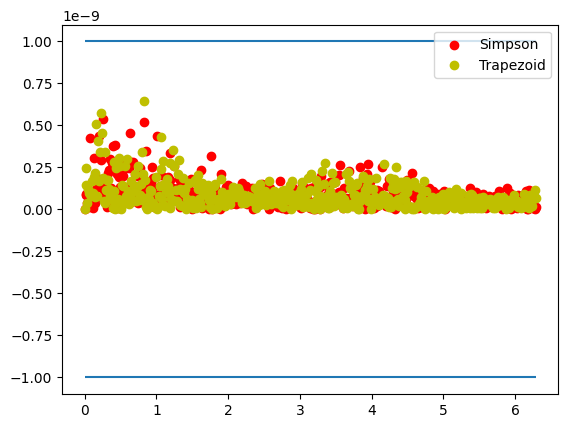

In [9]:
plt.rcParams['figure.dpi'] = 100
plt.scatter(interval, np.abs(simpson_result), label="Simpson", c='r')
plt.scatter(interval, np.abs(trapezoid_result), label="Trapezoid", c='y')
plt.hlines(precision, xmin=interval[0], xmax=interval[-1])
plt.hlines(-precision, xmin=interval[0], xmax=interval[-1])
plt.legend()
plt.show()